In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
history

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(123)
df = pd.read_csv("C:/Users/Student/Desktop/dummyaaa.csv")
y = df['stars_review']
#y = y.values
X = df.drop(['stars_review'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
#y_val_onehot = keras.utils.to_categorical(y_val,num_classes=6)
#y_train_onehot = keras.utils.to_categorical(y_train,num_classes=6)
#y_test_onehot = keras.utils.to_categorical(y_test,num_classes=6)
#y_train_onehot=pd.DataFrame(y_train_onehot).iloc[:,1:6].values
#y_val_onehot=pd.DataFrame(y_val_onehot).iloc[:,1:6].values
#y_test_onehot=pd.DataFrame

In [12]:
np.random.seed(123)
df = pd.read_csv("C:/Users/Student/Desktop/dummyaaa.csv")
y = df['stars_review']
#y = y.values
X = df.drop(['stars_review'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
#y_val_onehot = keras.utils.to_categorical(y_val,num_classes=6)
#y_train_onehot = keras.utils.to_categorical(y_train,num_classes=6)
#y_test_onehot = keras.utils.to_categorical(y_test,num_classes=6)
#y_train_onehot=pd.DataFrame(y_train_onehot).iloc[:,1:6].values
#y_val_onehot=pd.DataFrame(y_val_onehot).iloc[:,1:6].values
#y_test_onehot=pd.DataFrame(y_test_onehot).iloc[:,1:6].values

In [3]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
data_train = xgb.DMatrix( X_train, label=y_train)
data_test  = xgb.DMatrix( X_test, label=y_test)

C:\Users\Student\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


## ref: https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/4226/

## optimize n_estimator

In [8]:
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  6.5min finished


[14:18:01] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
每輪迭代執行結果:{'mean_fit_time': array([36.61270704, 45.15041547, 53.83588047, 63.11996989, 68.01645789]), 'std_fit_time': array([0.7384989 , 1.00110771, 0.24441544, 1.46180173, 5.12460062]), 'mean_score_time': array([0.51245894, 0.62807446, 0.76243901, 0.90305266, 0.95617142]), 'std_score_time': array([0.00624974, 0.02072729, 0.0153083 , 0.01169163, 0.06510119]), 'param_n_estimators': masked_array(data=[400, 500, 600, 700, 800],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 400}, {'n_estimators': 500}, {'n_estimators': 600}, {'n_estimators': 700}, {'n_estimators': 800}], 'split0_test_score': array([0.3686221 , 0.36748313, 0.36576428, 0.36433115, 0.36278018]), 'split1_test_score': array([0.35481504, 0.35320981, 0.35166282, 0.34949532, 0.34748686]), 'split2_te

## optimize max_depth, ,min_child_weight

In [26]:
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=2, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed: 13.6min finished
C:\Users\Student\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:21:45] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
每輪迭代執行結果:{'mean_fit_time': array([14.03794265, 14.1473099 , 14.28011227, 14.30353963, 14.19418263,
       14.41292202, 18.0298146 , 17.87357509, 17.83451653, 17.70952666,
       17.50641656, 17.54546738, 21.6701504 , 21.70139575, 21.48266578,
       21.24049664, 21.72483361, 21.52172256, 26.07604849, 26.01355112,
       26.6072638 , 26.62288845, 26.34946215, 26.32603598, 30.95065999,
       31.74746931, 30.81785822, 31.36469722, 30.71630192, 30.81785977,
       35.55185497, 35.45029879, 36.08306396, 35.73152649, 36.2236762 ,
       35.80183482, 41.33264554, 41.59824777, 41.1842196 , 40.6295743 ,
       40.76237655, 40.71550548, 46.63690865, 46.75408685, 46.47286117,
       46.49629521, 45.98852301, 46.09007752]), 'std_fit_time': array([5.46827316e-02, 3.90585661e-02, 1.56223774e-02, 5.46902418e-02,
       7.03072548e-02, 7.80403614e-03, 3

## optimize gamma

In [27]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 550, 'max_depth': 3, 'min_child_weight': 4, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.5min finished


[15:47:28] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
每輪迭代執行結果:{'mean_fit_time': array([31.21626282, 31.53811078, 32.56695485, 32.86579976, 32.13222637,
       29.42026124]), 'std_fit_time': array([0.27079137, 0.81786117, 0.15951136, 0.29420413, 0.90121395,
       1.79847403]), 'mean_score_time': array([0.41871624, 0.39371881, 0.41551166, 0.42104325, 0.38133202,
       0.43655367]), 'std_score_time': array([0.02072712, 0.01530813, 0.01449449, 0.01728736, 0.02914598,
       0.0323335 ]), 'param_gamma': masked_array(data=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.1}, {'gamma': 0.2}, {'gamma': 0.3}, {'gamma': 0.4}, {'gamma': 0.5}, {'gamma': 0.6}], 'split0_test_score': array([0.37028699, 0.3698978 , 0.37022384, 0.37022384, 0.37006135,
       0.3701623 ]), 'split1_test_score

##  optimize subsample, colsample_bytree

In [30]:
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 4, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.6, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  7.8min finished


[17:37:38] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
每輪迭代執行結果:{'mean_fit_time': array([20.69695621, 18.75642066, 17.80797596, 17.30908608, 21.3625381 ,
       21.94733958, 20.95875158, 19.55239058, 23.39385915, 22.51955347,
       23.85978246, 21.88220634, 26.16722131, 25.11629734, 24.68553681,
       23.43541679]), 'std_fit_time': array([0.50320903, 0.79360132, 0.35101172, 0.613105  , 0.68297661,
       0.64002563, 0.78409809, 0.28061261, 0.35183581, 0.3532    ,
       1.28980081, 0.90879777, 0.38278542, 0.40991135, 0.40486112,
       0.72352038]), 'mean_score_time': array([0.27691612, 0.26532874, 0.24454961, 0.25873508, 0.26153178,
       0.26033545, 0.2661273 , 0.25933509, 0.28610749, 0.26772633,
       0.25693688, 0.27511873, 0.31687536, 0.27132149, 0.27092252,
       0.23995438]), 'std_score_time': array([0.0164563 , 0.04771967, 0.03512862, 0.02664136, 0.03257576,
       0.02075507, 0.

## optimize reg_alpha, reg_lamba

In [31]:
 cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.6, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed: 16.8min finished


[17:57:48] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
每輪迭代執行結果:{'mean_fit_time': array([29.44725981, 29.42009144, 29.84405723, 29.84885211, 29.13038831,
       29.61089649, 29.63027616, 29.79870496, 28.82809725, 29.71119399,
       29.94315581, 29.43827362, 30.30338874, 29.99909925, 29.83666511,
       31.15431709, 29.68542047, 29.89540534, 30.11438136, 29.96753201,
       30.19669671, 29.72098398, 29.80289941, 29.84685488, 28.46007404]), 'std_fit_time': array([0.17391456, 0.2488885 , 0.23066338, 0.35790084, 0.20255542,
       0.29756941, 0.28943086, 0.2387708 , 0.434069  , 0.53062818,
       0.3707171 , 0.42680777, 0.49936033, 0.64694971, 0.66242444,
       0.62669531, 0.19899825, 0.5508766 , 0.35808892, 0.52708334,
       0.60207475, 0.57263083, 0.56784154, 0.46305672, 2.19095965]), 'mean_score_time': array([0.39120002, 0.38460674, 0.39919157, 0.41157875, 0.40818429,
       0.41537457, 0.3

## optimize leaning rate

In [32]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.6, 'reg_alpha': 2, 'reg_lambda': 2}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  3.6min finished


[18:18:58] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
每輪迭代執行結果:{'mean_fit_time': array([29.71379118, 29.63846831, 29.73337193, 30.16592932, 28.05548925]), 'std_fit_time': array([0.2969602 , 0.34155388, 0.39569594, 0.19097144, 2.67829198]), 'mean_score_time': array([0.37761374, 0.39819512, 0.39979572, 0.4083818 , 0.38081021]), 'std_score_time': array([0.01492436, 0.01536834, 0.01336912, 0.00777421, 0.02147661]), 'param_learning_rate': masked_array(data=[0.01, 0.05, 0.07, 0.1, 0.2],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.01}, {'learning_rate': 0.05}, {'learning_rate': 0.07}, {'learning_rate': 0.1}, {'learning_rate': 0.2}], 'split0_test_score': array([0.3592305 , 0.37141885, 0.37138632, 0.37160717, 0.36404529]), 'split1_test_score': array([0.34570012, 0.35745737, 0.35890814, 0.35829047, 0.35137466])

## ref:https://blog.csdn.net/chuanda112233/article/details/51913254

In [4]:
data_train = xgb.DMatrix( X_train, label=y_train)
data_test  = xgb.DMatrix( X_test, label=y_test)
#給予模型參數，告知演算法該如何訓練模型
#optimized param = {'learning_rate': 0.07, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
#'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.6, 'reg_alpha': 2, 'reg_lambda': 2}
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'reg:linear' 
#param['objective']='multi:softmax'
#param['num_class']= 6
param['tree_method'] = 'hist'
param['silent']=1
param['max_depth']=6
param['min_child_weight'] = 4
param['subsample']=0.7
#param['colsample_bytree']=0.8
param['eta']=0.01
param['gamma']=0.5
#param['learning_rate']=0.07
#param['reg_alpha']=2
#param['reg_lambda']=2
#param['n_estimators']=400
eval_list  = [(data_train,'train'),(data_test,'test')]
num_round = 90
eval_history={}

# 訓練模型
model = xgb.train( param, data_train, num_round,eval_list,
                  evals_result=eval_history,verbose_eval=False)

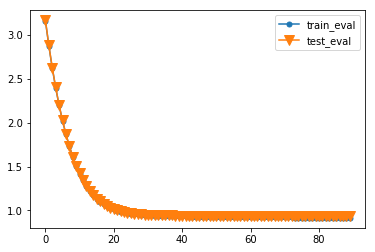

In [5]:
# process 
rmse_train=eval_history['train']['rmse']
rmse_test=eval_history['test']['rmse']
plt.plot(rmse_train,ms=10,marker='.',label='train_eval')
plt.plot(rmse_test,ms=10,marker='v',label='test_eval')
plt.legend()
plt.show()



In [6]:
# 檢視最後rms error
model.eval(data_test)

'[0]\teval-rmse:0.935165'

In [7]:
# 檢視最後rms error
model.eval(data_train)

'[0]\teval-rmse:0.913145'

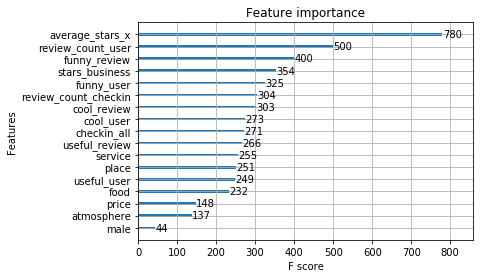

In [8]:
# importence of columns
from xgboost import plot_importance
plot_importance(model)
plt.show()



## use R square for evaluation

In [9]:
from sklearn.metrics import r2_score, accuracy_score
testY_pred=model.predict(data_test)
r2_score(y_test, testY_pred)

0.3617660018584621

In [10]:
trainY_pred = model.predict(data_train)
r2_score(y_train, trainY_pred)

0.3987764139346467